In [68]:
import numpy as np
import matplotlib.pyplot as plt

import machinevisiontoolbox as mvt

from matplotlib.patches import Polygon
from pathlib import Path

# makes matplotlib plots inline/inside iPython notebook
# note: just %matplotlib notebook causes 'ReferenceError: IPython is not defined when using the notebook in vscode. The fix appears to be the jupyeter-matplotlib extension see
# https://github.com/matplotlib/ipympl, or adding the line %matplotlib inline
%matplotlib notebook
%matplotlib inline


print('RVC Chapter 10 Figures')

nm = 1e-9

RVC Chapter 10 Figures


Figure 10.2(a)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


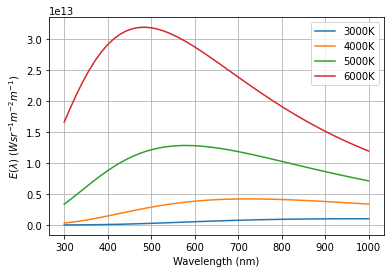

In [69]:
lam = np.linspace(300, 1000, 50)
for T in [3000, 4000, 5000, 6000]:
    e = mvt.blackbody(lam * nm, T)
    plt.plot(lam, e, label=f"{T}K")
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('$E(\lambda)\,\, (W sr^{-1} m^{-2} m^{-1})$')
plt.legend()
plt.savefig((Path('graphics') / 'fig10_2a.eps').as_posix())

Figure 10.2(b), need to add human eye response

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


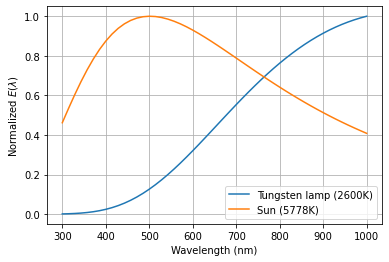

In [70]:
plt.figure()
lam = np.linspace(300, 1000, 50)

e = mvt.blackbody(lam * nm, 2600)
plt.plot(lam, e / max(e), label="Tungsten lamp (2600K)")

e = mvt.blackbody(lam * nm, 5778)
plt.plot(lam, e / max(e), label="Sun (5778K)")

plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized $E(\lambda)$')
plt.legend()
plt.savefig((Path('graphics') / 'fig10_2b.eps').as_posix())

Figure 10.3a

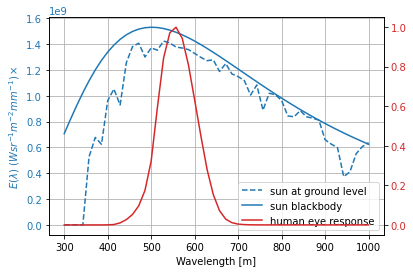

<Figure size 432x288 with 0 Axes>

In [71]:
sun_ground = mvt.loadspectrum(lam * nm, (Path('data') / 'solar').as_posix())
sun_blackbody = mvt.blackbody(lam * nm, 5778)
scale = 0.58e-4

eye_response = mvt.rluminos(lam * nm)

fig, ax1 = plt.subplots()  # create a figure and an axes

# set left axes
color1 = 'tab:blue'
l1 = ax1.plot(lam, sun_ground.s, '--', color=color1, label='sun at ground level')
l2 = ax1.plot(lam, sun_blackbody * scale, '-', color=color1, label='sun blackbody')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylabel(r'$E(\lambda)\,\, (W sr^{-1} m^{-2} mm^{-1}) \times$', color=color1)
ax1.set_xlabel('Wavelength [m]')

# set right axes
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color2 = 'tab:red'
l3 = ax2.plot(lam, eye_response, '-r', color=color2, label='human eye response')
ax2.tick_params(axis='y', labelcolor=color2)

ax1.grid()
legend_lines = l1 + l2 + l3
legend_labels = [leg.get_label() for leg in legend_lines]
ax1.legend(legend_lines, legend_labels)

plt.show()
# https://stackoverflow.com/questions/7906365/matplotlib-savefig-plots-different-from-show
plt.savefig((Path('graphics') / 'fig10_3a.eps').as_posix())
# TODO put legend in top right corner of plot


Figure 10.3b

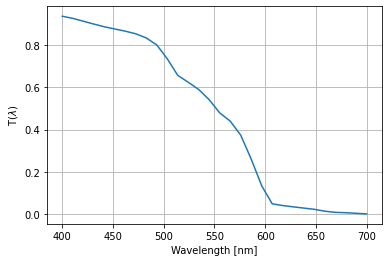

<Figure size 432x288 with 0 Axes>

In [72]:
plt.figure()
lam_water = np.linspace(400,700,30) 
water_spectrum = mvt.loadspectrum(lam_water * nm,(Path('data') / 'water').as_posix())
d = 5.0
T = 10.0**(- water_spectrum.s * d)

plt.plot(lam_water, T)
plt.grid()
plt.xlabel('Wavelength [nm]')
plt.ylabel(r'T($\lambda$)')
plt.show()
plt.savefig((Path('graphics') / 'fig10_3b.eps').as_posix())
# TODO looks a bit different from 10.3b - is it the data, interpolation method, or plotting?


Figure 10.4 a

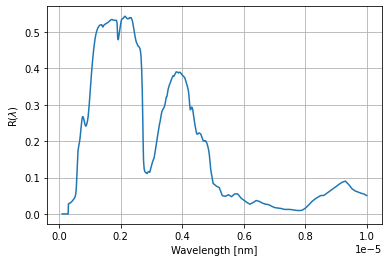

<Figure size 432x288 with 0 Axes>

In [73]:
plt.figure()
lam = np.arange(100, 10000, step=10) * nm
e = mvt.loadspectrum(lam, (Path('data') / 'redbrick').as_posix())

# TODO add vertical lines

plt.plot(lam, e.s)
plt.xlabel('Wavelength [nm]')
plt.ylabel('R($\lambda$)')
plt.grid()
plt.show()
plt.savefig((Path('graphics') / 'fig10_4a.eps').as_posix())

Figure 10.4 b


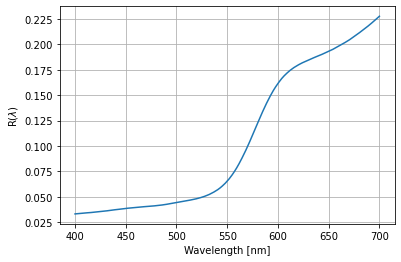

<Figure size 432x288 with 0 Axes>

In [74]:
plt.figure()

lam = np.linspace(400,700,400) * nm
e = mvt.loadspectrum(lam, (Path('data') / 'redbrick').as_posix())

# TODO set same y-axis as 10.4a

plt.plot(lam / nm, e.s)
plt.xlabel('Wavelength [nm]')
plt.ylabel('R($\lambda$)')
plt.grid()
plt.show()
plt.savefig((Path('graphics') / 'fig10_4b.eps').as_posix())

Figure 10.5

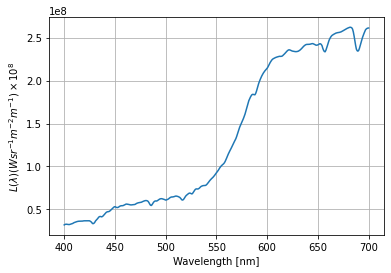

<Figure size 432x288 with 0 Axes>

In [75]:
plt.figure()
lam = np.linspace(400, 700, 400) * nm
e = mvt.loadspectrum(lam, (Path('data') / 'solar').as_posix())
r = mvt.loadspectrum(lam, (Path('data') / 'redbrick').as_posix())

l = e.s * r.s

plt.plot(lam / nm, l)
plt.xlabel('Wavelength [nm]')
plt.ylabel(r'$L(\lambda) (W sr^{-1} m^{-2} m^{-1}) \times 10^{8}$')
plt.grid()
plt.show()
plt.savefig((Path('graphics') / 'fig10_5.eps').as_posix())

Figure 10.7


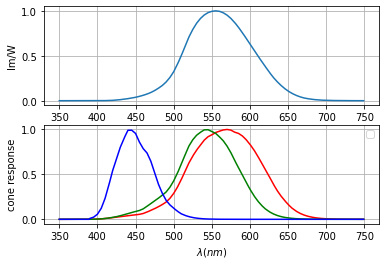

<Figure size 432x288 with 0 Axes>

In [76]:
print('Figure 10.7')

lam = np.arange(350, 750) * nm
human = mvt.luminos(lam)

ax1 = plt.subplot(2,1,1)  # amusingly, indexed to 1, not 0!

ax1.plot(lam / nm, human, color='tab:blue',label='human')
ax1.set_ylabel('lm/W')
ax1.set_xlabel(r'$\lambda (nm)$')
ax1.grid()

cones = mvt.loadspectrum(lam, (Path('data') / 'cones').as_posix())

ax2 = plt.subplot(2,1,2)

l1 = ax2.plot(lam / nm, cones.s[:, 0], 'r')
l2 = ax2.plot(lam / nm, cones.s[:, 1], 'g')
l3 = ax2.plot(lam / nm, cones.s[:, 2], 'b')
ax2.set_ylabel('cone response')
ax2.set_xlabel(r'$\lambda (nm)$')
ax2.grid()


legend_lines = l1 + l2 + l3
legend_labels = [leg.get_label() for leg in legend_lines]
ax2.legend(legend_lines, legend_labels)
plt.show()
plt.savefig((Path('graphics') / 'fig10_7a.eps').as_posix())

# TODO ensure common x-axis ticks

Figure 10.9b


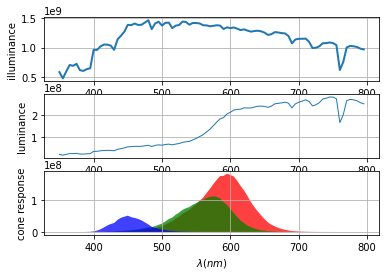

<Figure size 432x288 with 0 Axes>

In [77]:

print('Figure 10.9b')

lam = np.arange(350, 800, 5) * nm
E = mvt.loadspectrum(lam, (Path('data') / 'solar').as_posix())
R = mvt.loadspectrum(lam, (Path('data') / 'redbrick').as_posix())
C = mvt.loadspectrum(lam, (Path('data') / 'cones').as_posix())

ax0 = plt.subplot(3,1,1)
ax0.plot(lam / nm, E.s, linewidth=2)
ax0.grid()
ax0.set_ylabel('illuminance')

L = np.squeeze(E.s * R.s)

ax1 = plt.subplot(3,1,2)
ax1.plot(lam / nm, L, linewidth=1)
ax1.grid()
ax1.set_ylabel('luminance')

alpha = 0.7

#B = np.squeeze(L) * C.s[:,0]
#for i in range(len(C.s[:,0])):
#    print('{0:.8f}'.format(B[i]))

ax2 = plt.subplot(3,1,3)
# TODO should be plotted using area()
# TODO make this into a giant polygon - joint first/last pt, join them across to form the polygon
# use alpha = 0.5
p0 = np.transpose(np.vstack((lam / nm, L * C.s[:, 0])))
#print(p0)
#print(p0.shape)
poly0 = Polygon(p0, closed=True, facecolor='r', linestyle='-', alpha=0.75)
ax2.add_patch(poly0)

p1 = np.transpose(np.vstack((lam / nm, L * C.s[:, 1])))
poly1 = Polygon(p1, closed=True, facecolor='g', linestyle='-', alpha=0.75)
ax2.add_patch(poly1)

p2 = np.transpose(np.vstack((lam / nm, L * C.s[:, 2])))
poly2 = Polygon(p2, closed=True, facecolor='b', linestyle='-', alpha=0.75)
ax2.add_patch(poly2)

ax2.plot(lam / nm, L * C.s[:,0], color='r', linewidth=1.5, alpha=0)  # addpatch (above) seems to require a plot, so workaround is to plot something and make alpha = 0

# ax2.plot(lam / nm, L * C.s[:,1], color='g', linewidth=1.5)
# ax2.plot(lam / nm, L * C.s[:,2], color='b', linewidth=1.5)
ax2.set_ylabel('cone response')
ax2.set_xlabel(r'$\lambda (nm)$')
ax2.grid()

plt.show()
plt.savefig((Path('graphics') / 'fig10_9b.eps').as_posix())


Figure 10.10


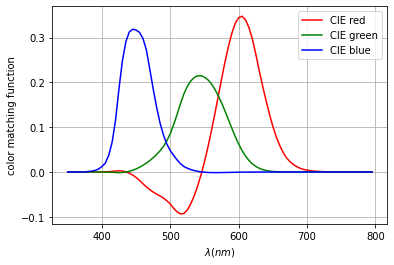

<Figure size 432x288 with 0 Axes>

In [78]:

print('Figure 10.10')

lam = np.arange(350, 800, 5) * nm
cmf = mvt.cmfrgb(lam, kind='cubic')

plt.plot(lam / nm, cmf[:,0], 'r', label='CIE red')
plt.plot(lam / nm, cmf[:,1], 'g', label='CIE green')
plt.plot(lam / nm, cmf[:,2], 'b', label='CIE blue')
plt.ylabel('color matching function')
plt.xlabel(r'$\lambda (nm)$')
plt.grid()
plt.legend()

plt.show()
plt.savefig((Path('graphics') / 'fig10_10.eps').as_posix())


Figure 10.11
[[ 1.00000000e+00 -1.46370618e-18]
 [-3.05877620e-04  1.00022045e+00]
 [-1.40178455e-04  5.76521422e-05]]
(3, 2)


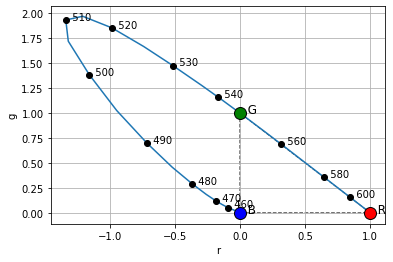

<Figure size 432x288 with 0 Axes>

In [79]:

print('Figure 10.11')

lam = np.arange(400, 700) * nm

rg = mvt.lambda2rg(lam)
ax = plt.subplot(1, 1, 1)  # TODO not certain if this is necessary, but needed a plotting object to pass

ax.plot(rg[0:, 0], rg[0:, 1])
mvt.rg_addticks(ax)

# show and label primaries
prim = mvt.lambda2rg(mvt.cie_primaries(), kind='cubic')

print(prim)
print(prim.shape)
poly = Polygon(prim, closed=True, facecolor='None', linestyle='--', edgecolor='k', alpha=0.75)
poly.set_color=None
ax.add_patch(poly)

ax.plot(prim[0, 0], prim[0, 1], marker='o', markeredgecolor='k', markerfacecolor='r', markersize=12)
ax.plot(prim[1, 0], prim[1, 1], marker='o', markeredgecolor='k', markerfacecolor='g', markersize=12)
ax.plot(prim[2, 0], prim[2, 1], marker='o', markeredgecolor='k', markerfacecolor='b', markersize=12)
ax.text(prim[0, 0], prim[0, 1], '  R', fontsize=12)
ax.text(prim[1, 0], prim[1, 1], '  G', fontsize=12)
ax.text(prim[2, 0], prim[2, 1], '  B', fontsize=12)
ax.grid()

ax.set_xlabel('r')
ax.set_ylabel('g')

plt.show()
plt.savefig((Path('graphics') / 'fig10_11.eps').as_posix())


Figure 10.12
[[0.         0.56815051]]


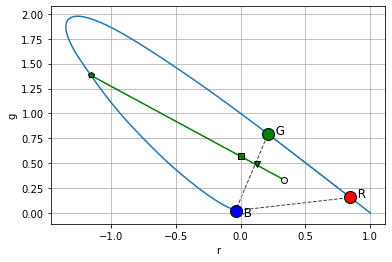

<Figure size 432x288 with 0 Axes>

In [80]:

print('Figure 10.12')

gcc = mvt.lambda2rg(500 * nm)
wcc = mvt.tristim2cc(np.r_[1, 1, 1])

ax = plt.subplot(1,1,1)

# show locus
rg = mvt.lambda2rg(np.arange(400, 700) * 1e-9, kind='quadratic')

ax.plot(rg[0:, 0], rg[0:, 1])

# show and label primaries
# TODO different from cie_primaries?
prim = mvt.lambda2rg(np.r_[600, 555, 450] * nm)
poly = Polygon(prim, closed=True, facecolor='None', linestyle='--', edgecolor='k', alpha=0.75)
poly.set_color=None
ax.add_patch(poly)

ax.plot(prim[0, 0], prim[0, 1], marker='o', markeredgecolor='k', markerfacecolor='r', markersize=12)
ax.plot(prim[1, 0], prim[1, 1], marker='o', markeredgecolor='k', markerfacecolor='g', markersize=12)
ax.plot(prim[2, 0], prim[2, 1], marker='o', markeredgecolor='k', markerfacecolor='b', markersize=12)
ax.text(prim[0, 0], prim[0, 1], '  R', fontsize=12)
ax.text(prim[1, 0], prim[1, 1], '  G', fontsize=12)
ax.text(prim[2, 0], prim[2, 1] - 0.06, '  B', fontsize=12)

ax.plot((gcc[0, 0], wcc[0, 0]), (gcc[0, 1], wcc[0, 1]), 'g')

# TODO check with RVC2.pdf to see what plot2 is doing/what the final plot should look like
ax.plot(gcc[0, 0], gcc[0, 1], 'g', marker='p', markeredgecolor='k')
ax.plot(wcc[0, 0], wcc[0, 1], 'w', marker='o', markeredgecolor='k')

# TODO feasible green
green = mvt.cmfrgb(500e-9)
w = -np.min(green)
white = np.r_[w, w, w]

feasible_green = green + white
fgcc = mvt.tristim2cc(feasible_green)
print(fgcc)
ax.plot(fgcc[0][0], fgcc[0][1], 'g', marker='s', markeredgecolor='k')

# gamut boundary
ax.plot(0.1229, 0.4885, 'g', marker='v', markeredgecolor='k')

ax.set_xlabel('r')
ax.set_ylabel('g')

ax.grid()

plt.show()
plt.savefig((Path('graphics') / 'fig10_12.eps').as_posix())

Figure 10.13a


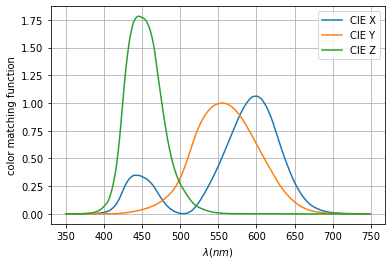

<Figure size 432x288 with 0 Axes>

In [81]:

print('Figure 10.13a')

lam = np.arange(350, 750) * nm
cmf = mvt.cmfxyz(lam)

plt.plot(lam / nm, cmf)

#plt.plot(lam / nm, cmf[:,0], 'r', label='CIE red')
#plt.plot(lam / nm, cmf[:,1], 'g', label='CIE green')
#plt.plot(lam / nm, cmf[:,2], 'b', label='CIE blue')
plt.ylabel('color matching function')
plt.xlabel(r'$\lambda (nm)$')
plt.grid()
plt.legend(labels=('CIE X', 'CIE Y', 'CIE Z'))

plt.show()
plt.savefig((Path('graphics') / 'fig10_13a.eps').as_posix())



Figure 10.13b
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


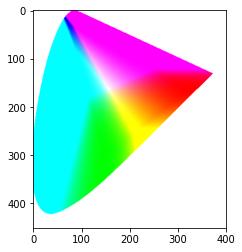

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


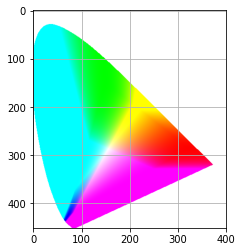

In [90]:

print('Figure 10.13b')

lam = np.arange(350, 750) * nm
xy = mvt.lambda2xy(lam)
xycolor = mvt.showcolorspace('xy')
xycolor = np.flip(xycolor, axis=0)
plt.grid()
plt.imshow(xycolor)
#print(xy)
#print(xy.shape)
# plt.plot(xy[0:, 0], xy[0:, 1], linewidth=1)  
# # following fig10_13.m, colorspace looks a bit different...

plt.savefig((Path('graphics') / 'fig10_13b.eps').as_posix())


Figure 10.15


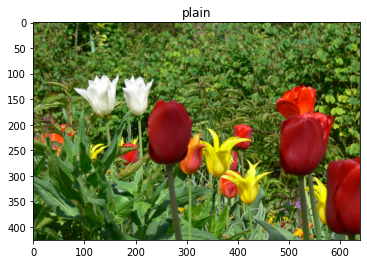

In [91]:

print('Figure 10.15')
flowers = mvt.iread((Path('images') / 'flowers4.png').as_posix())
mvt.idisp(flowers, title='plain')

# hsv = ... # need to do hsv colorspace conversion